In [0]:
import os
import gc
import numpy as np
import pandas as pd
import pickle
from keras.layers import Dense, Input, Dropout,Flatten,MaxPooling1D,SpatialDropout2D,SpatialDropout1D
from keras.layers import Conv1D, MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers
from sklearn.preprocessing import Normalizer

In [0]:
with open('pca_500_x_pd','rb') as f:
    X = pickle.load(f)
with open('pca_y_pd','rb') as f:
    Y = pickle.load(f)

In [0]:
nor = Normalizer()

In [0]:
nor.fit(X)

Normalizer(copy=True, norm='l2')

In [0]:
X = nor.transform(X)

In [0]:
X.shape

(120975, 500)

In [0]:
Y.shape

(120975,)

In [0]:
learning_rate=0.0001
decay=0.0000001
momentum=0.99

dropout_rate = 0.15

rglrzr = regularizers.l2(0.0003)

In [65]:
model = Sequential()


model.add(Dense(500,activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(rate=dropout_rate))

model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=dropout_rate))

model.add(Dense(25,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=dropout_rate))

model.add(Dense(5,activation='relu'))
model.add(Dense(1))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 500)               250500    
_________________________________________________________________
batch_normalization_20 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_20 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 100)               50100     
_________________________________________________________________
batch_normalization_21 (Batc (None, 100)               400       
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 25)                2525      
__________

In [0]:
optimizer = optimizers.adam(lr=learning_rate,decay=decay)
model.compile(loss='mse',
              optimizer=optimizer, 
              metrics=['mae','mse'])

In [0]:
cb=[]

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=0, mode='auto')
early_stopping = EarlyStopping(monitor='acc', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

#cb.append(reduce_lr)
cb.append(early_stopping)

In [68]:
history=model.fit(X, Y,
          batch_size=256,
          epochs=50,
          verbose=1,
          callbacks=cb,
          validation_split=0.3,
          shuffle=True)

Train on 84682 samples, validate on 36293 samples
Epoch 1/50
84682/84682 [==============================] - 11s 134us/step - loss: 2971.3007 - mean_absolute_error: 36.5018 - mean_squared_error: 2971.3007 - val_loss: 2985.7432 - val_mean_absolute_error: 35.5809 - val_mean_squared_error: 2985.7432
Epoch 2/50
 1792/84682 [..............................] - ETA: 7s - loss: 2120.0074 - mean_absolute_error: 34.9825 - mean_squared_error: 2120.0074

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


84682/84682 [==============================] - 9s 103us/step - loss: 2932.7498 - mean_absolute_error: 35.8626 - mean_squared_error: 2932.7498 - val_loss: 2963.3435 - val_mean_absolute_error: 35.1627 - val_mean_squared_error: 2963.3435
Epoch 3/50
84682/84682 [==============================] - 9s 101us/step - loss: 2909.5846 - mean_absolute_error: 35.4944 - mean_squared_error: 2909.5846 - val_loss: 2943.1775 - val_mean_absolute_error: 34.8655 - val_mean_squared_error: 2943.1775
Epoch 4/50
84682/84682 [==============================] - 9s 103us/step - loss: 2883.0928 - mean_absolute_error: 35.1418 - mean_squared_error: 2883.0928 - val_loss: 2916.9586 - val_mean_absolute_error: 34.5659 - val_mean_squared_error: 2916.9586
Epoch 5/50
84682/84682 [==============================] - 9s 103us/step - loss: 2845.7244 - mean_absolute_error: 34.7229 - mean_squared_error: 2845.7244 - val_loss: 2877.2175 - val_mean_absolute_error: 34.1835 - val_mean_squared_error: 2877.2175
Epoch 6/50
84682/84682 [===

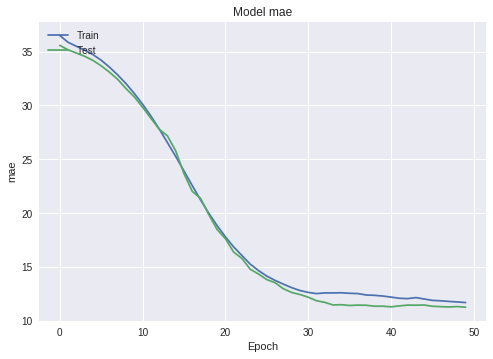

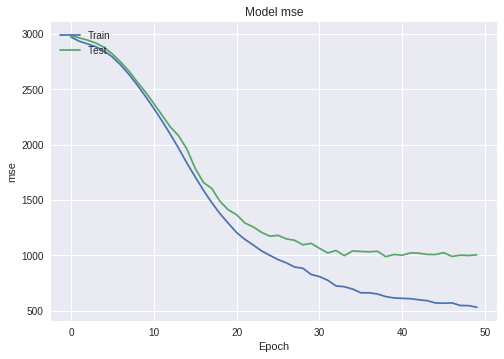

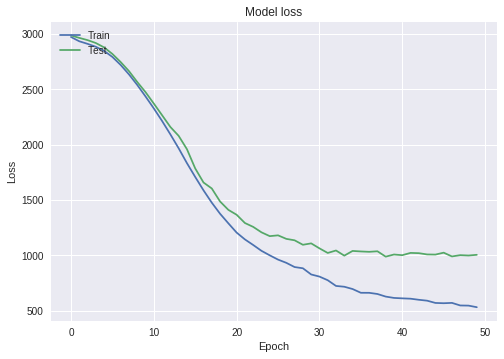

In [69]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()